# [CptS 215 Introduction to Algorithmic Problem Solving](https://github.com/gsprint23/cpts215)
[Washington State University](https://wsu.edu)

[Gina Sprint](http://eecs.wsu.edu/~gsprint/)
## PA3 Sorting Analysis (100 pts)

### Learner Objectives
At the conclusion of this programming assignment, participants should be able to:
* Implement sorting routines
* Analyze the "work" of sorting routines

### Prerequisites
Before starting this programming assignment, participants should be able to:
* Implement linked lists
* Perform algorithm analysis
* Use the `pandas` library
* Create plots with `matplotlib`

### Acknowledgments
Content used in this assignment is based upon information in the following sources:
* None to report

## Overview and Requirements
For this programming assignment, we are going to investigate how much "work" different sorting routines do, based on the input size and order of the data. We will record the work done by writing output CSV (comma separated value) files and creating various plots using [`matplotlib`](https://matplotlib.org/).

Note: for this assignment, *do not use Jupyter Notebook* to code your solution. Use standard .py files and save your output to .csv and .png files (see the program details below for more on program output).

### Program Details
#### Data Structure
Implement a doubly linked circular linked list of `Node` objects called `CircularDoublyLinkedList`. The data of each `Node` in the list is an integer. You will collect measurements for:
1. An already sorted linked list
1. An already sorted linked list in *descending* order
1. A linked list containing random data

#### List Size Configurations
Generate each of the above linked lists with the following number of nodes:
1. 500
1. 1000
1. 5000
1. 10000
1. (more values if you wish)

Note: **Make copies of the original lists (as necessary) and pass the copies to each sorting routine so each routine is operating on the same data!** This is important in order to compare the results of the different algorithms.

#### Sorting Routines
Implement the following linked list sorting routines (implemented as a function or as a method of your `CircularDoublyLinkedList` class):
1. Selection sort
1. Early exit bubble sort (stops when the list is sorted)
1. Insertion sort
1. Shell sort
1. Merge sort
1. Quick sort

#### Data to Collect
For each sorting routine above, create a [`pandas`](http://pandas.pydata.org/) `DataFrame` with rows for each list size configuration and columns for each metric to collect. The metrics to collect include the algorithm's execution time using [`timeit`](https://docs.python.org/3/library/timeit.html) and counts for the following operations:
1. Number of data comparisons
1. Number of loop control comparisons
1. Number of assignment operations involving data
1. Number of assignment operations involving loop control
1. "Other" operations (operations that don't fall into one of the above categories)
1. Total number of operations (sum of the above)

Note: Be sure to comment everything you count in your code.

Pictorially, here is an example `DataFrame` for a sorting routine:

|List configuration|Seconds|# Data|# Loop|# Data assignments|# Loop assignments|# Other|Total|
|-|-|-|-|-|-|-|-|
|Sorted N=500||||||||
|Sorted N=1000||||||||
|Sorted N=5000||||||||
|Sorted N=10000||||||||
|Descending sorted N=500||||||||
|Descending sorted N=1000||||||||
|Descending sorted N=5000||||||||
|Descending sorted N=10000||||||||
|Random N=500||||||||
|Random N=1000||||||||
|Random N=5000||||||||
|Random N=10000|||||||||


#### Program Output
##### CSV Files
Write the contents of each sorting routine `DataFrame` to a CSV file with a filename of the form `<algorithm>_sort_results.csv`. For example, `bubble_sort_results.csv`. See the function [`to_csv()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_csv.html) in the pandas library for a straightforward way to do this! In total, your program should output 6 csv files, one for each sorting routine.

#### Plots to Generate
For each of the three list configurations (sorted, descending sorted, random), create two plots with list size on the x-axis (i.e. 500, 1000, 5000, 10000) and the following on the y-axis:
1. Plot 1: running time
1. Plot 2: total operation count

Each plot should have a separate curve for each sorting routine. For example (example purposes only!!):

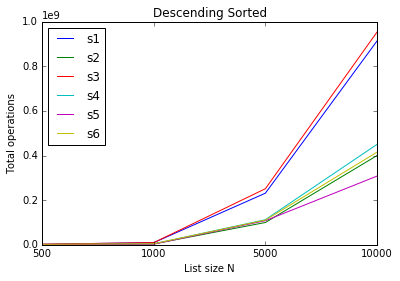

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# dummy data for plotting purposes only!
s1 = pd.Series([2491628, 9757340, 231305150, 912997432], index=[500, 1000, 5000, 10000], name="s1")
s2 = pd.Series([1000400, 3999374, 99946590, 399770054], index=[500, 1000, 5000, 10000], name="s2")
s3 = pd.Series([2693079, 9860287, 251320053, 953027247], index=[500, 1000, 5000, 10000], name="s3")
s4 = pd.Series([1139655, 4526769, 112543347, 449865228], index=[500, 1000, 5000, 10000], name="s4")
s5 = pd.Series([1000689, 2885861, 108040588, 307912139], index=[500, 1000, 5000, 10000], name="s5")
s6 = pd.Series([2127301, 4673410, 110782327, 414933108], index=[500, 1000, 5000, 10000], name="s6")
sers = [s1, s2, s3, s4, s5, s6]

x_locs = np.arange(1, 5)
x_labels = [500, 1000, 5000, 10000]
f, ax = plt.subplots()
ax.set_title("Descending Sorted")
ax.set_ylabel("Total operations")
ax.set_xlabel("List size N")
ax.set_xticks(x_locs)
ax.set_xticklabels(x_labels)
for ser in sers:
    plt.plot(x_locs, ser, label=ser.name)
plt.legend(loc=0)

In total, your program should output 6 plots (3 list configurations * 2 metrics to plot). Save your plots as .png files (see the function [`savefig()`](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.savefig) for a straightforward way to do this!).

## Bonus (5 pts)
Read about the `pandas` [`Panel`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Panel.html) object:
>Panel is a somewhat less-used, but still important container for 3-dimensional data. The term panel data is derived from econometrics and is partially responsible for the name pandas: pan(el)-da(ta)-s. The names for the 3 axes are intended to give some semantic meaning to describing operations involving panel data and, in particular, econometric analysis of panel data. However, for the strict purposes of slicing and dicing a collection of DataFrame objects, you may find the axis names slightly arbitrary:
* items: axis 0, each item corresponds to a DataFrame contained inside
* major_axis: axis 1, it is the index (rows) of each of the DataFrames
* minor_axis: axis 2, it is the columns of each of the DataFrames

Instead of storing each sorting routine's measurements in a `DataFrame` store the measurements in a `Panel` in the following configuration:
* items: list configuration (e.g. labels ["sorted", "descending sorted", "random"])
* major_axis: N (e.g. labels [500, 1000, 5000, 10000])
* minor_axis: metrics (e.g. labels ["Seconds", "# Data", "# Loop", "# Data assignments", "# Loop assignments", "# Other", "Total"])

## Submitting Assignments
1.	Use the Blackboard tool https://learn.wsu.edu to submit your assignment. You will submit your code to the corresponding programming assignment under the "Content" tab. You must upload your solutions as `<your last name>_pa3.zip` by the due date and time.
2.	Your .zip file should contain your .py files, .csv files, and .png files.

## Grading Guidelines
This assignment is worth 100 points + 5 points bonus. Your assignment will be evaluated based on a successful compilation and adherence to the program requirements. We will grade according to the following criteria:
* 20 pts for correct `CircularDoublyLinkedList` implementation
* 30 pts for correct implementation of each sorting routine and operation counts (5 pts/per routine)
* 10 pts for correct list type generation (sorted, descending sorted, random)
* 5 pts for correct list size configurations
* 10 pts for properly using `DataFrame`s to store results
* 5 pts for correct CSV file output
* 15 pts for correct plots
* 5 pts for adherence to proper programming style and comments established for the class